# Running an Pure Pursuit Agent in the Racing Scenario

This notebook introduces how to train an agent within the developed traffic scenario [envs/racing.py](https://github.com/WoodOxen/tactics2d/blob/master/tactics2d/envs/racing.py). This environment can generate a racing track with a centerline.

## Install dependencies

**This notebook is using pygame to render the environment. You may need to download the notebook and run it locally.**

1. Download this notebook.

2. Run the commands in the next cell to install the dependencies.

In [1]:
# %pip install tactics2d

In [1]:
import sys
sys.path.append("../..")
sys.path.append("../../tactics2d")

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import gymnasium as gym
import numpy as np
from shapely.geometry import LinearRing, LineString, Point

from tactics2d.envs import RacingEnv
from tactics2d.controller import PurePursuitController

In [2]:
render_mode = ["rgb_array", "human"][1]
env = RacingEnv(
    render_mode=render_mode,
    render_fps=60,
    max_step=int(1e5),
    continuous=True
)
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {'state': <tactics2d.participant.trajectory.state.State at 0x7f04fcb986d0>,
  'traffic_status': <TrafficStatus.NORMAL: 1>,
  'scenario_status': <Scen

In [4]:
map_ = env.unwrapped.scenario_manager.map_

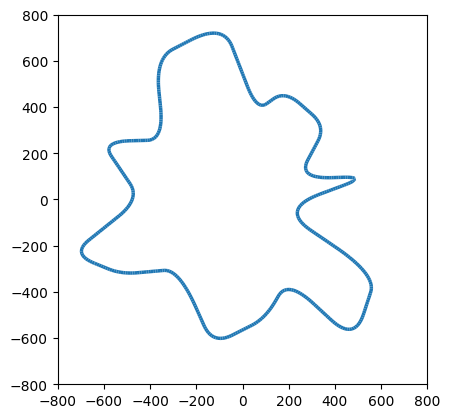

In [13]:
def visualize_map(map_):
    fig, ax = plt.subplots()
    for lane in map_.lanes.values():
        # print(lane)
        ax.add_patch(Polygon(lane.shape))
    
    ax.set_xlim(-800, 800)
    ax.set_ylim(-800, 800)
    ax.set_aspect("equal")
    plt.show()

visualize_map(map_)

In [16]:
center_line = map_.roadlines["center_line"]

获取ego_vehicle 全局坐标，结合历史轨迹+centerline truncate waypoint，选取一个【合适的】作为reference point（全局坐标），输入给pure pursuit。

In [ ]:
pure_pursuit_controller = PurePursuitController()